**The Map Coloring Problem** 
The map-coloring constraint satisfaction problem requires that you assign a color to each region of a map such that any two regions sharing a border have different colors.

The constraints for the map-coloring problem can be expressed as follows:
1. Each region is assigned one color only, of possible colors.
2. The color assigned to one region cannot be assigned to adjacent regions.

For this project our objective will be: Given a map of Canada, color it using four colors such that no neighboring territories have the same color.
---



In [ ]:
#load the required libraries
import networkx as nx
import matplotlib.pyplot as plt 
import copy
import random
import time

In [ ]:
#Define the provinces of Australia and their neighbors
provinces = ['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'NT', 'NU', 'ON', 'PE',
             'QC', 'SK', 'YT']
neighbors = [('AB', 'BC'), ('AB', 'NT'), ('AB', 'SK'), ('BC', 'NT'), ('BC', 'YT'),
             ('MB', 'NU'), ('MB', 'ON'), ('MB', 'SK'), ('NB', 'NS'), ('NB', 'QC'),
             ('NL', 'QC'), ('NT', 'NU'), ('NT', 'SK'), ('NT', 'YT'), ('ON', 'QC')]
# define the position of the points on the cartisian plane 
pos = {'AB': (1, 5), 'BC': (3, 7), 'MB': (1, 1), 'NB': (8, 2), 'NL': (10, 4),
       'NS': (8, 4), 'NT': (3, 3), 'NU': (3, -1), 'ON': (6, 4), 'PE': (9, 3),
       'QC': (8, 6), 'SK': (2, 2), 'YT': (5, 9)}

In [ ]:
#Define the possible colors
colors = ['red', 'green', 'orange', 'yellow']



---


Lets now look at the implementation of the map coloring game using **Backtracking** Algorithm 

---



In [ ]:
# Define the function to check if a color can be assigned to a province
def is_color_valid(province, color, assignment):
    for neighbor in neighbors:
        if province in neighbor and neighbor[1 - neighbor.index(province)] in assignment and \
           assignment[neighbor[1 - neighbor.index(province)]] == color:
            return False
    return True

In [ ]:
# Define the backtracking function to find a valid assignment
def backtracking(assignment):
    # If all provinces are assigned a color, return the assignment
    if len(assignment) == len(provinces):
        return assignment
    
    # Select an unassigned province
    unassigned_provinces = [province for province in provinces if province not in assignment]
    province = unassigned_provinces[0]
    
    # Try assigning each possible color to the province
    for color in colors:
        if is_color_valid(province, color, assignment):
            assignment[province] = color
            result = backtracking(assignment)
            if result is not None:
                return result
            del assignment[province]
    # If no color can be assigned, backtrack
    return None

In [ ]:
# Find a valid assignment using backtracking
assignment1 = backtracking({})
if assignment1 is not None:
    print('Valid assignment found:')
    print(assignment1)
else:
    print('No valid assignment found')

Valid assignment found:
{'AB': 'red', 'BC': 'green', 'MB': 'red', 'NB': 'red', 'NL': 'red', 'NS': 'green', 'NT': 'orange', 'NU': 'green', 'ON': 'green', 'PE': 'red', 'QC': 'orange', 'SK': 'green', 'YT': 'red'}


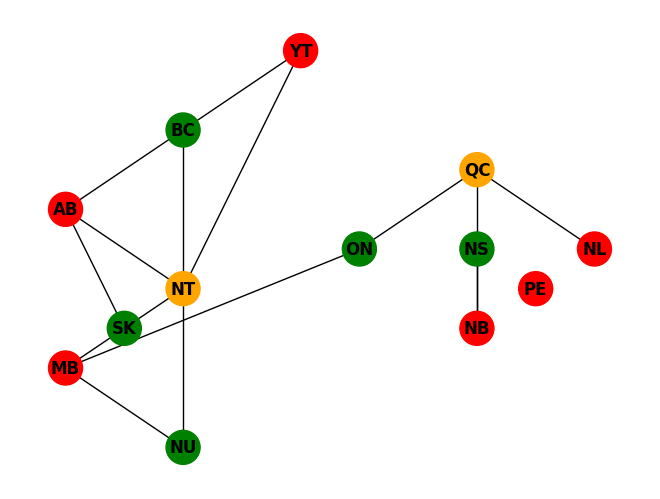

In [ ]:
# Create a graph with provinces as nodes and neighbor pairs as edges
G = nx.Graph()
G.add_nodes_from(provinces)
G.add_edges_from(neighbors)

# Set node colors based on the solution of the map coloring game
node_colors = [assignment1[province] for province in provinces]
# Draw the graph with node labels and edge labels
nx.draw(G, pos, with_labels=True, font_size=12, node_color=node_colors, node_size=600, font_color='black', font_weight='bold')
edge_labels = {(i, j): '' for i, j in neighbors}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, label_pos=0.5, font_color='black')
plt.axis('off')
plt.show()



---


Implementation of Map Coloring Problem Using **Forward checking**

---



In [22]:

# This function checks if the color assignment for a province is valid.
def is_valid_color(assignment, province, color, neighbors):
    for neighbor in neighbors:
        if province in neighbor and neighbor[1] in assignment and assignment[neighbor[1]] == color:
            return False
    return True
# This function updates the domains of possible colors for each province based on the current assignment.
def update_domains(domains, assignment, current_province, color, neighbors):
    updated_domains = {province: domains[province].copy() for province in provinces}
    for neighbor in neighbors:
        if current_province in neighbor and color in updated_domains[neighbor[1]]:
            updated_domains[neighbor[1]].remove(color)
    return updated_domains





In [23]:
# This function performs map coloring using forward checking.
def map_coloring_forward_checking(assignment, provinces, domains, neighbors):
    if len(assignment) == len(provinces):
        return assignment

    current_province = None
    for province in provinces:
        if province not in assignment:
            current_province = province
            break

    if current_province is None:
        return None

    for color in domains[current_province]:
        if is_valid_color(assignment, current_province, color, neighbors):
            assignment[current_province] = color
            updated_domains = update_domains(domains, assignment, current_province, color, neighbors)
            result = map_coloring_forward_checking(assignment, provinces, updated_domains, neighbors)
            if result:
                return result
            del assignment[current_province]

    return None


In [26]:
# This function solves the map coloring problem using forward checking.
def solve_map_coloring(provinces, colors, neighbors):
    assignment = {}
    domains = {province: set(colors) for province in provinces}
    return map_coloring_forward_checking(assignment, provinces, domains, neighbors)

if __name__ == "__main__":
    assignment2 = solve_map_coloring(provinces, colors, neighbors)
    print(assignment2)

{'AB': 'yellow', 'BC': 'green', 'MB': 'yellow', 'NB': 'yellow', 'NL': 'yellow', 'NS': 'green', 'NT': 'orange', 'NU': 'green', 'ON': 'green', 'PE': 'yellow', 'QC': 'orange', 'SK': 'green', 'YT': 'yellow'}


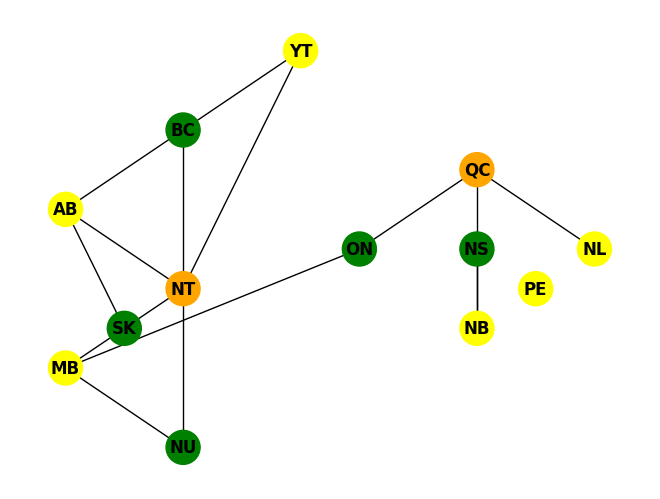

In [27]:
# Create a graph with provinces as nodes and neighbor pairs as edges
G = nx.Graph()
G.add_nodes_from(provinces)
G.add_edges_from(neighbors)

# Set node colors based on the solution of the map coloring game
node_colors = [assignment2[province] for province in provinces]
# Draw the graph with node labels and edge labels
nx.draw(G, pos, with_labels=True, font_size=12, node_color=node_colors, node_size=600, font_color='black', font_weight='bold')
edge_labels = {(i, j): '' for i, j in neighbors}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, label_pos=0.5, font_color='black')
plt.axis('off')
plt.show()

Lets now use **Local search** to implement map coloring problem 

In [ ]:
# Initialize random assignments
assignment3 = {province: random.choice(colors) for province in provinces}

def cost(assignment, neighbors):
    total = 0
    for neighbor in neighbors:
        if assignment[neighbor[0]] == assignment[neighbor[1]]:
            total += 1
    return total

def get_neighbors(assignment, province, colors):
    neighbors = []
    for color in colors:
        if color != assignment[province]:
            new_assignment = assignment.copy()
            new_assignment[province] = color
            neighbors.append(new_assignment)
    return neighbors




In [ ]:
# Perform local search
while True:
    curr_cost = cost(assignment3, neighbors)
    print('Current cost:', curr_cost)
    if curr_cost == 0:
        break
    best_neighbor = None
    best_cost = curr_cost
    for province in provinces:
        for neighbor in get_neighbors(assignment3, province, colors):
            neighbor_cost = cost(neighbor, neighbors)
            if neighbor_cost < best_cost:
                best_neighbor = neighbor
                best_cost = neighbor_cost
    if best_neighbor is None:
        break
    assignment3 = best_neighbor
print(assignment3)


Current cost: 7
Current cost: 5
Current cost: 3
Current cost: 1
Current cost: 0
{'AB': 'green', 'BC': 'yellow', 'MB': 'red', 'NB': 'red', 'NL': 'green', 'NS': 'yellow', 'NT': 'orange', 'NU': 'green', 'ON': 'green', 'PE': 'orange', 'QC': 'yellow', 'SK': 'yellow', 'YT': 'red'}


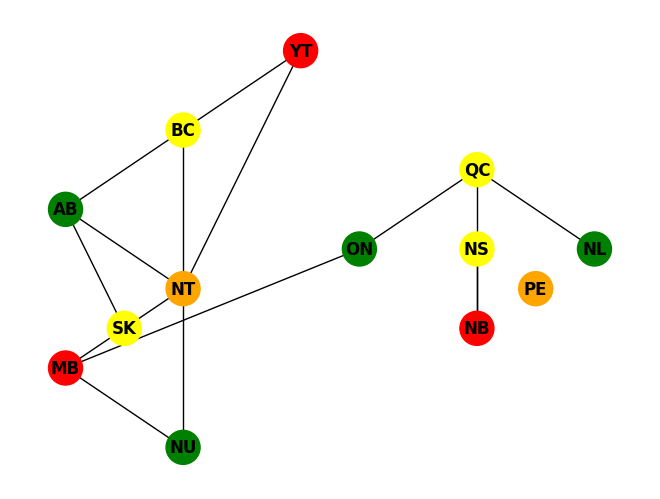

In [ ]:
# Create a graph with provinces as nodes and neighbor pairs as edges
G = nx.Graph()
G.add_nodes_from(provinces)
G.add_edges_from(neighbors)

# Set node colors based on the solution of the map coloring game
node_colors3 = [assignment3[province] for province in provinces]
       
nx.draw(G, pos, with_labels=True, font_size=12, node_color=node_colors3, node_size=600, font_color='black', font_weight='bold')
edge_labels = {(i, j): '' for i, j in neighbors}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, label_pos=0.5, font_color='black')
plt.axis('off')
plt.show()

Now we will use **Arc Consistency** to implement the Map Coloring Problem 

---



In [ ]:
# Function to implement arc consistency algorithm
def arc_consistency(provinces, domain, neighbors):
    queue = [(i, j) for i, j in neighbors]
    while queue:
        (i, j) = queue.pop(0)
        if remove_inconsistent_values(i, j, domain, neighbors):
            if not domain[i]:
                return False
            for k in neighbors:
                if k[1] == i and k != (j, i):
                    queue.append(k)
    return True


In [ ]:
# Function to remove inconsistent values from a domain
def remove_inconsistent_values(i, j, domain, neighbors):
    removed = False
    values_to_remove = set()
    for x in domain[i]:
        if not any([consistent(x, y, i, j) for y in domain[j]]):
            values_to_remove.add(x)
            removed = True
    domain[i] -= values_to_remove
    return removed


# Function to check if two values are consistent
def consistent(x, y, i, j):
    return x != y or (i, j) not in neighbors



In [ ]:
# Function to get the domain of values for a province
def get_domain(province, assignment, neighbors):
    d = set(colors)
    for neighbor in neighbors:
        if province == neighbor[0] and neighbor[1] in assignment:
            if assignment[neighbor[1]] in d:
                d.remove(assignment[neighbor[1]])
        elif province == neighbor[1] and neighbor[0] in assignment:
            if assignment[neighbor[0]] in d:
                d.remove(assignment[neighbor[0]])
    return d



In [ ]:
# Find a solution using the arc consistency algorithm
assignment4 = {}
remaining = set(provinces)
domain = {province: get_domain(province, assignment4, neighbors) for province in provinces}
if arc_consistency(provinces, domain, neighbors):
    for province in provinces:
        if len(domain[province]) == 1:
            assignment4[province] = domain[province].pop()
    while remaining:
        var = min(remaining, key=lambda x: len(domain[x]))
        value = domain[var].pop()
        new_assignment = copy.deepcopy(assignment4)
        new_assignment[var] = value
        new_domain = {province: set(domain[province]) for province in provinces}
        new_domain[var] = {value}
        if arc_consistency(provinces, new_domain, neighbors):
            assignment4[var] = value
            remaining.remove(var)
            domain = new_domain
        else:
            domain[var].add(value)
else:
    print("No solution exists.")
print(assignment4)   

{'PE': 'yellow', 'SK': 'yellow', 'AB': 'green', 'MB': 'green', 'NT': 'orange', 'BC': 'yellow', 'YT': 'green', 'NB': 'yellow', 'NU': 'yellow', 'ON': 'yellow', 'NS': 'green', 'QC': 'green', 'NL': 'yellow'}


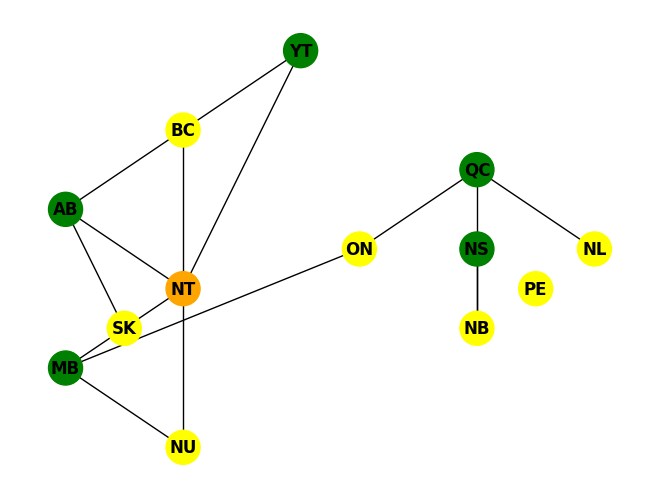

In [28]:
#Create a graph with provinces as nodes and neighbor pairs as edges
G = nx.Graph()
G.add_nodes_from(provinces)
G.add_edges_from(neighbors)

# Set node colors based on the solution of the map coloring game
node_colors = [assignment4[province] for province in provinces]

nx.draw(G, pos, with_labels=True, font_size=12, node_color=node_colors, node_size=600, font_color='black', font_weight='bold')
edge_labels = {(i, j): '' for i, j in neighbors}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, label_pos=0.5, font_color='black')
plt.axis('off')
plt.show()